# About Data:
The dataset consists of the following columns:

* Name: Unique identifier for each automobile.
* MPG: Fuel efficiency measured in miles per gallon.
* Cylinders: Number of cylinders in the engine.
* Displacement: Engine displacement, indicating its size or capacity.
* Horsepower: Power output of the engine.
* Weight: Weight of the automobile.
* Acceleration: Capability to increase speed, measured in seconds.
* Model Year: Year of manufacture for the automobile model.
* Origin: Country or region of origin for each automobile.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Automobile.csv")

In [3]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

In [9]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


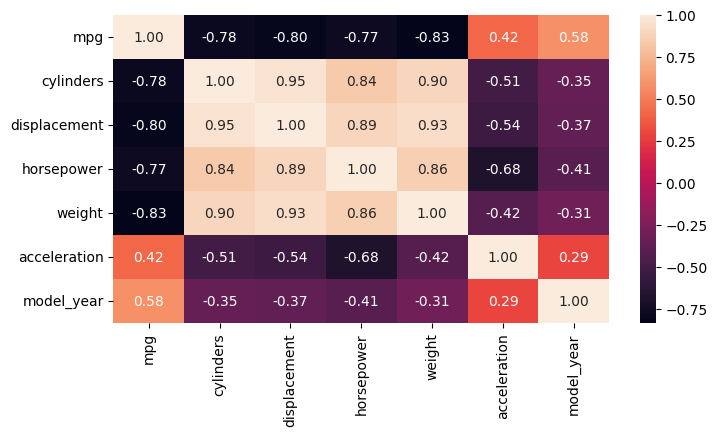

In [10]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

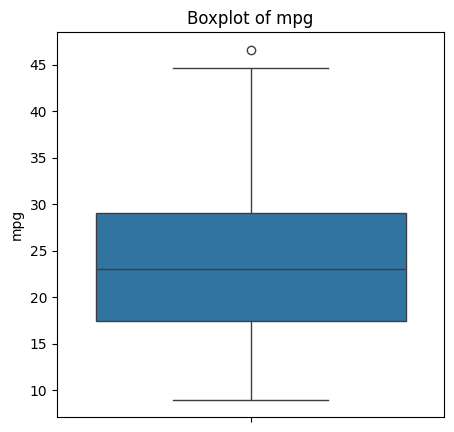

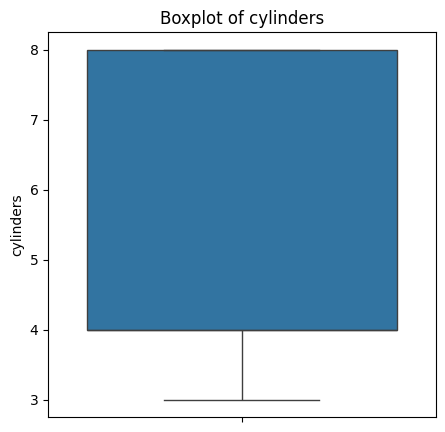

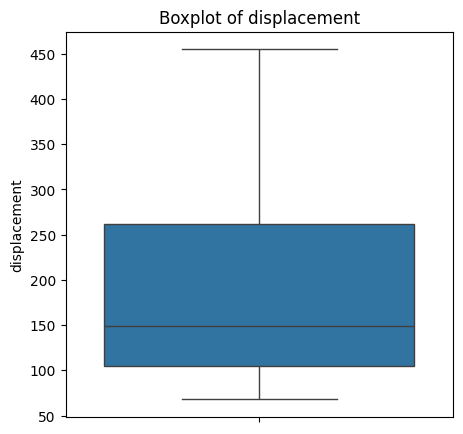

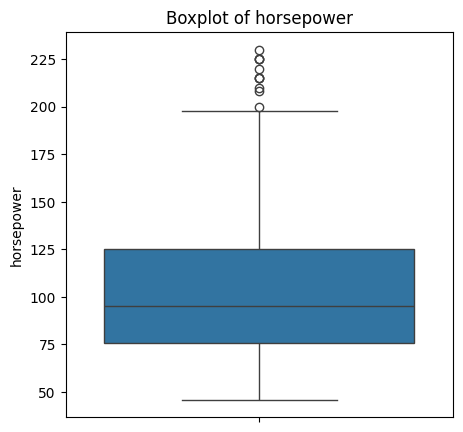

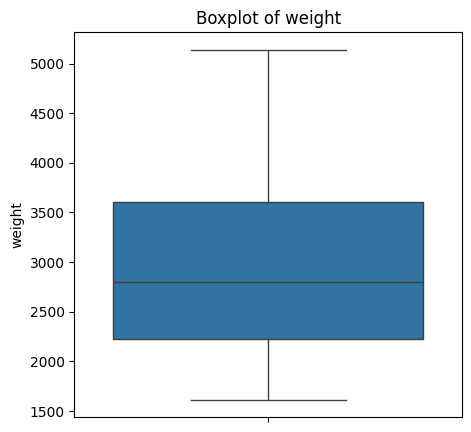

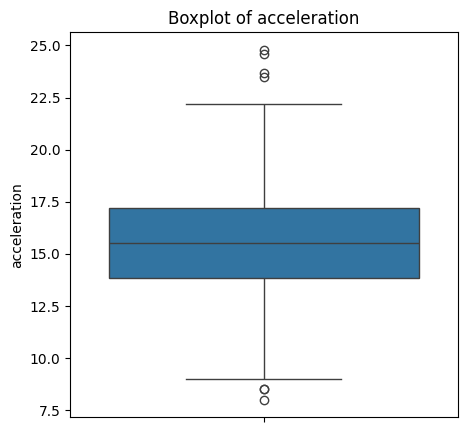

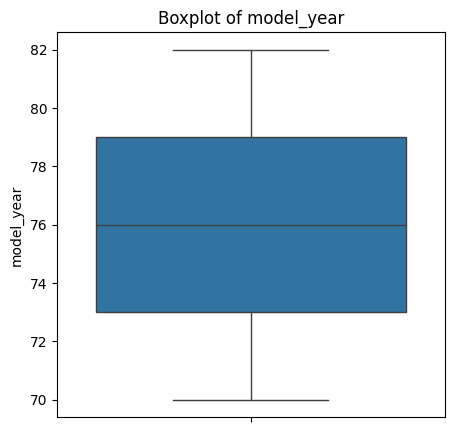

In [11]:
numeric_columns = df.select_dtypes(include='number')
for col in numeric_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:
# handle outliers in 'horsepower'
# first, calculate the IQR of 'horsepower'
Q1_hp = df['horsepower'].quantile(0.25)
Q3_hp = df['horsepower'].quantile(0.75)
IQR_hp = Q3_hp - Q1_hp

# define the upper and lower bounds for outliers
lower_bound_hp = Q1_hp - 1.5 * IQR_hp
upper_bound_hp = Q3_hp + 1.5 * IQR_hp

# cap outliers
df['horsepower'] = df['horsepower'].clip(lower=lower_bound_hp, upper=upper_bound_hp)

# repeat the process for 'acceleration'
Q1_acc = df['acceleration'].quantile(0.25)
Q3_acc = df['acceleration'].quantile(0.75)
IQR_acc = Q3_acc - Q1_acc

lower_bound_acc = Q1_acc - 1.5 * IQR_acc
upper_bound_acc = Q3_acc + 1.5 * IQR_acc

df['acceleration'] = df['acceleration'].clip(lower=lower_bound_acc, upper=upper_bound_acc)

# repeat the process for 'mpg'
Q1_mpg = df['mpg'].quantile(0.25)
Q3_mpg = df['mpg'].quantile(0.75)
IQR_mpg = Q3_mpg - Q1_mpg

lower_bound_mpg = Q1_acc - 1.5 * IQR_mpg
upper_bound_mpg = Q3_acc + 1.5 * IQR_mpg

df['mpg'] = df['mpg'].clip(lower=lower_bound_mpg, upper=upper_bound_mpg)

In [13]:
# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# Apply Min-Max scaling to the entire DataFrame
df_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

In [14]:
# Initialize the Normalizer
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')  # 'l2' indicates L2 normalization

# Apply L2 normalization to the entire DataFrame
df_normalized = pd.DataFrame(normalizer.fit_transform(numeric_columns), columns=numeric_columns.columns)

In [15]:
# Print the first few rows of the scaled DataFrames
print("Min-Max Scaled DataFrame:")
print(df_scaled_minmax.head())

# Print the first few rows of the normalized DataFrames
print("\nNormalized DataFrame:")
print(df_normalized.head())

Min-Max Scaled DataFrame:
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  0.239362        1.0      0.617571    0.456522  0.536150      0.238095   
1  0.159574        1.0      0.728682    0.646739  0.589736      0.208333   
2  0.239362        1.0      0.645995    0.565217  0.516870      0.178571   
3  0.186170        1.0      0.609819    0.565217  0.516019      0.238095   
4  0.212766        1.0      0.604651    0.510870  0.520556      0.148810   

   model_year  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

Normalized DataFrame:
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0  0.005113   0.002272      0.087201    0.036926  0.995286      0.003409   
1  0.004039   0.002154      0.094240    0.044427  0.994364      0.003096   
2  0.005210   0.002316      0.092048    0.043419  0.994580      0.003184   
3  0.004637   0.002319      0.088104    0.043472  0.994936      0.003478   
4  0.004905   0.00

In [16]:
# Remove rows where all values are blank or spaces
df_cleaned = df.replace(r'^\s*$', np.nan, regex=True).dropna()

In [17]:
# Sort DataFrame by multiple columns
df_sorted = df.sort_values(by=['origin', 'horsepower'])
df_sorted

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
19,volkswagen 1131 deluxe sedan,26.000,4,97.0,46.0,1835,20.5,70,europe
102,volkswagen super beetle,26.000,4,97.0,46.0,1950,21.0,73,europe
244,volkswagen rabbit custom diesel,34.425,4,90.0,48.0,1985,21.5,78,europe
325,vw rabbit c (diesel),34.425,4,90.0,48.0,2085,21.7,80,europe
326,vw dasher (diesel),34.425,4,90.0,48.0,2335,22.2,80,europe
...,...,...,...,...,...,...,...,...,...
27,dodge d200,11.000,8,318.0,198.5,4382,13.5,70,usa
67,mercury marquis,11.000,8,429.0,198.5,4633,11.0,72,usa
94,chrysler new yorker brougham,13.000,8,440.0,198.5,4735,11.0,73,usa
95,buick electra 225 custom,12.000,8,455.0,198.5,4951,11.0,73,usa


In [18]:
modelyear_origin = df.groupby('origin')['model_year'].value_counts().unstack().T
modelyear_origin

origin,europe,japan,usa
model_year,,,
70,5,2,22
71,4,4,20
72,5,5,18
73,7,4,29
74,6,6,15
75,6,4,20
76,8,4,22
77,4,6,18
78,6,8,22


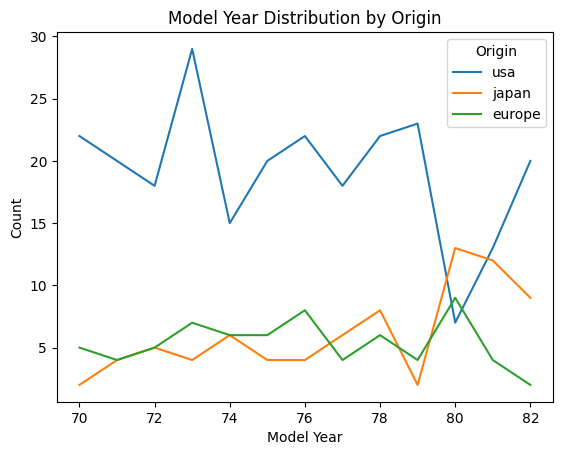

In [19]:
selected_origins = ['usa', 'japan', 'europe']
modelyear_selected = modelyear_origin[selected_origins]

# Create a line plot
modelyear_selected.plot(kind='line')

# Customize the plot
plt.title('Model Year Distribution by Origin')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.legend(title='Origin')

# Show the plot
plt.show()

In [20]:
model_year = df['model_year'].value_counts().sort_index()
model_year

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64

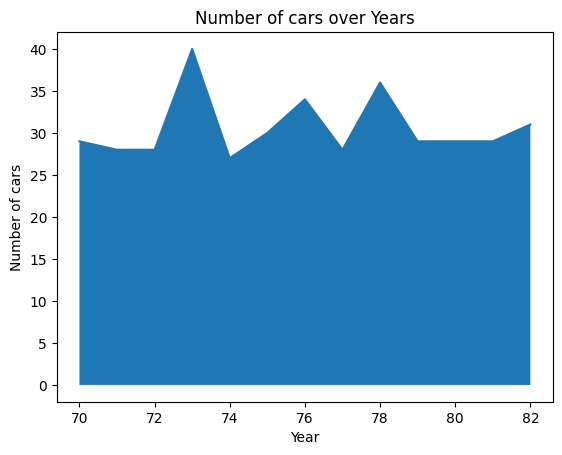

In [21]:
plt.plot(model_year.index, model_year.values)
plt.fill_between(model_year.index, model_year.values)
plt.xlabel('Year')
plt.ylabel('Number of cars')
plt.title('Number of cars over Years')
plt.show()

In [22]:
# Top 15 Cars with Highest Average MPG
name_mpg = df.groupby('name')['mpg'].mean().sort_values(ascending = False).head(15)
name_mpg

name
datsun 510 hatchback                 34.425
oldsmobile cutlass ciera (diesel)    34.425
nissan stanza xe                     34.425
triumph tr7 coupe                    34.425
renault lecar deluxe                 34.425
toyota starlet                       34.425
mercury lynx l                       34.425
honda civic 1500 gl                  34.425
dodge charger 2.2                    34.425
plymouth champ                       34.425
dodge colt hatchback custom          34.425
toyota corolla tercel                34.425
fiat strada custom                   34.425
plymouth horizon 4                   34.425
plymouth horizon miser               34.425
Name: mpg, dtype: float64

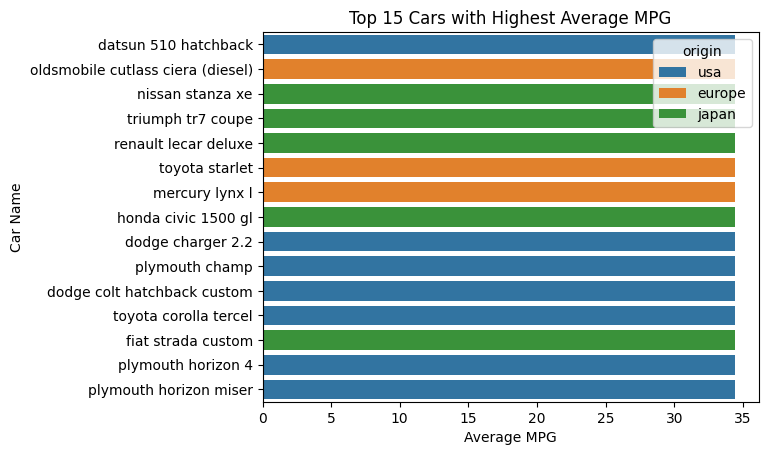

In [23]:
sns.barplot(x=name_mpg.values, y=name_mpg.index, hue=df[df['name'].isin(name_mpg.index)]['origin'])
plt.title('Top 15 Cars with Highest Average MPG')
plt.xlabel('Average MPG')
plt.ylabel('Car Name')
plt.show()

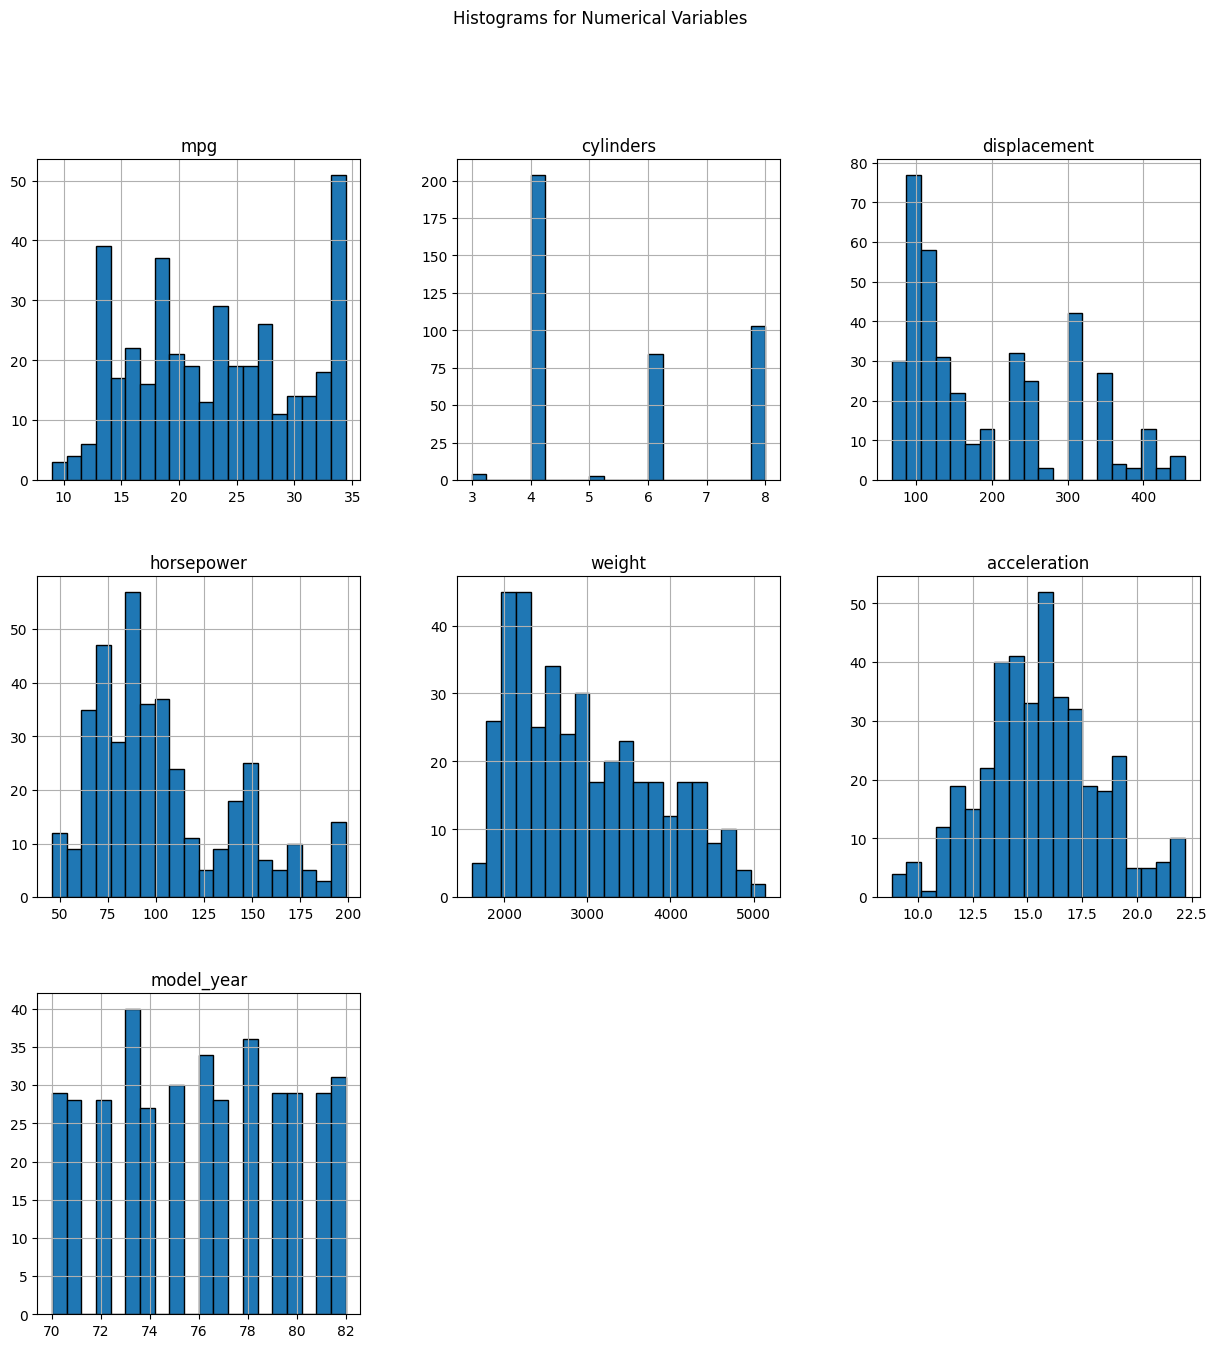

In [24]:
#histogram for each numerical column
df.hist(bins=20, figsize=(15, 15), edgecolor='black')
plt.suptitle('Histograms for Numerical Variables')
plt.show()

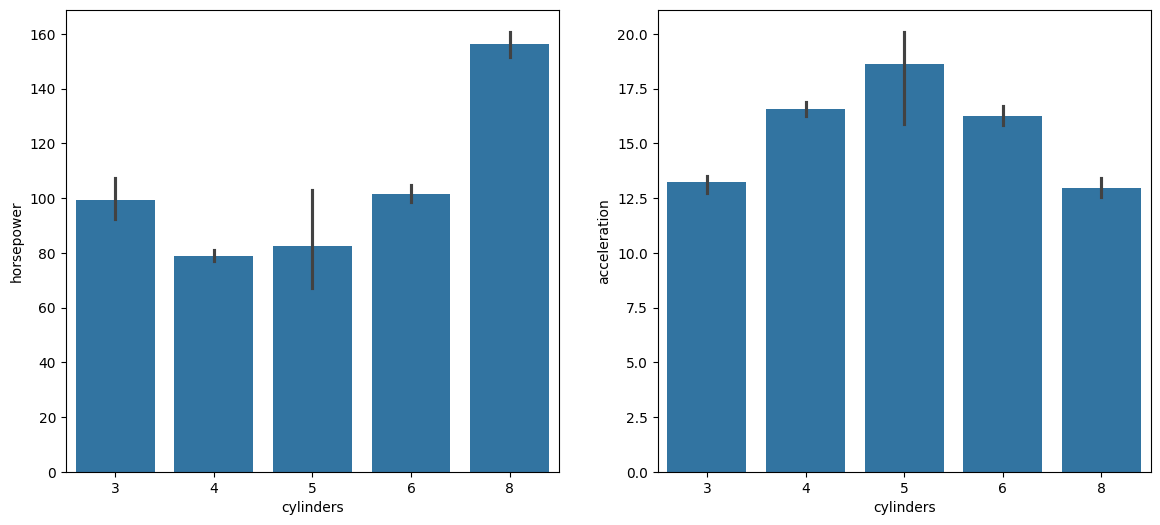

In [25]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(data=df, x = 'cylinders', y = 'horsepower')
plt.subplot(1,2,2)
sns.barplot(data=df, x = 'cylinders', y = 'acceleration')
plt.show()

In [26]:
origins = df.groupby('origin')['origin'].value_counts().reset_index()
origins

,origin,count
0,europe,70
1,japan,79
2,usa,249


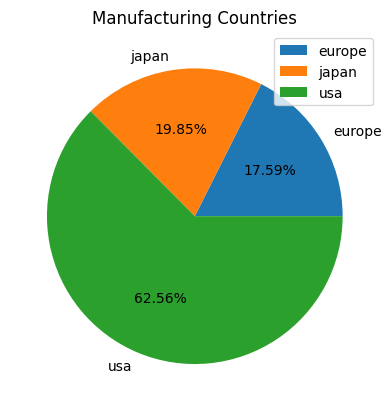

In [27]:
plt.pie(origins['count'], labels=origins['origin'], autopct='%1.2f%%')
plt.legend(origins['origin'])
plt.title("Manufacturing Countries")
plt.show()

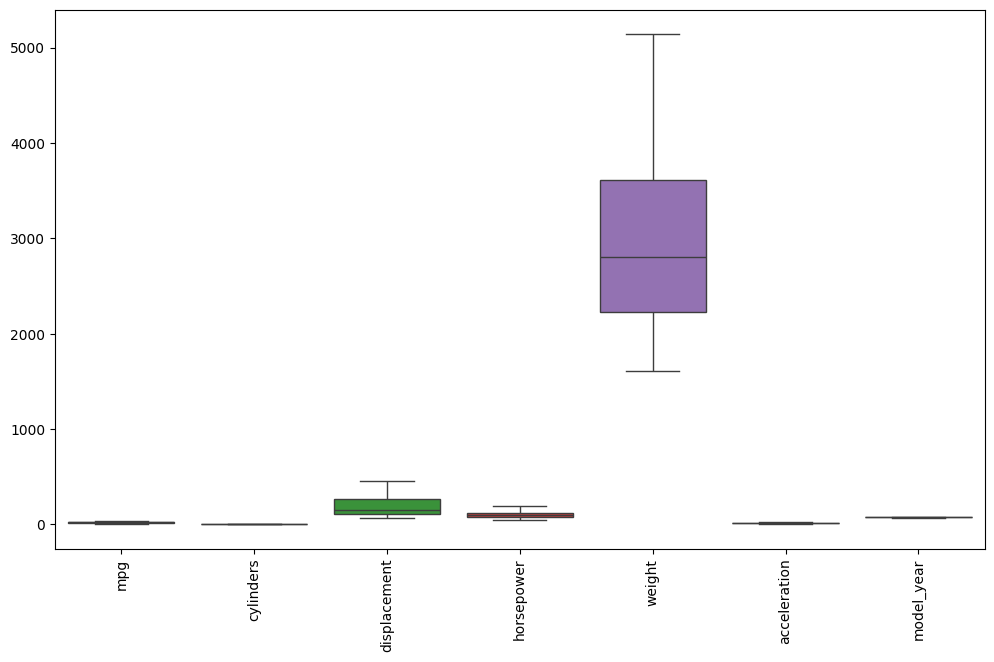

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='acceleration', ylabel='horsepower'>

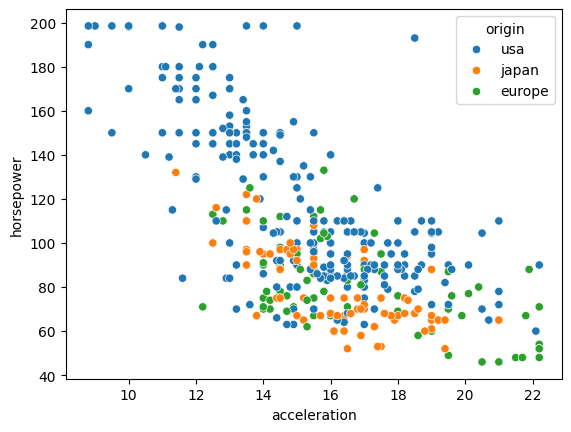

In [29]:
sns.scatterplot(x=df['acceleration'], y=df['horsepower'], hue=df['origin'])

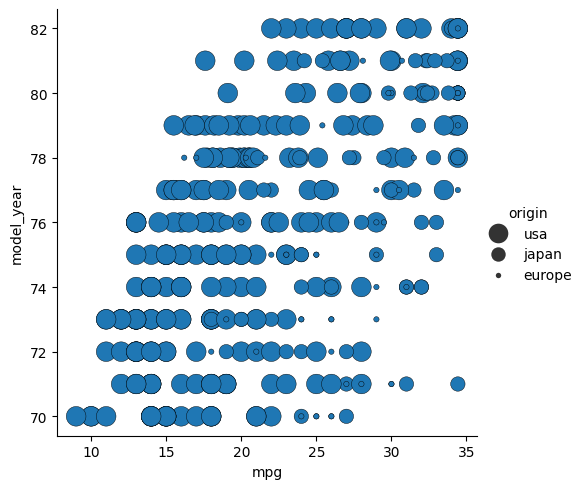

In [30]:
sns.relplot(data=df, x="mpg", y="model_year", size="origin", sizes=(15, 200), edgecolors='black')

# Machine Learning model using Decision Tree

In [32]:
df.origin.unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [33]:
# Label encoding for categorical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['name_encoded'] = label_encoder.fit_transform(df['name'])
df['origin_encoded'] = label_encoder.fit_transform(df['origin'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Determine what are the inputs and what is the output.

features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
target = 'origin_encoded'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, classification_report

In [36]:
accuracy_score(y_test,y_pred)

0.8

In [37]:
precision_score(y_test,y_pred, average='micro')

0.8

In [38]:
recall_score(y_test,y_pred, average='micro')

0.8

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        14
           1       0.62      0.62      0.62        13
           2       0.91      0.91      0.91        53

    accuracy                           0.80        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.80      0.80      0.80        80



In [40]:
# Build the Decision Tree classifier without scaling
dt_classifier_no_scaling = DecisionTreeClassifier(random_state=42)
dt_classifier_no_scaling.fit(X_train, y_train)

# Make predictions without scaling
y_pred_no_scaling = dt_classifier_no_scaling.predict(X_test)

# Evaluate accuracy without scaling
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f'Accuracy without scaling: {accuracy_no_scaling}')

# Apply Min-Max scaling to the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Decision Tree classifier with scaling
dt_classifier_scaling = DecisionTreeClassifier(random_state=42)
dt_classifier_scaling.fit(X_train_scaled, y_train)

# Make predictions with scaling
y_pred_scaling = dt_classifier_scaling.predict(X_test_scaled)

# Evaluate accuracy with scaling
accuracy_scaling = accuracy_score(y_test, y_pred_scaling)
print(f'Accuracy with scaling: {accuracy_scaling}')

Accuracy without scaling: 0.8
Accuracy with scaling: 0.8


In [41]:
# Build the Decision Tree classifier without normalization
from sklearn.preprocessing import StandardScaler

dt_classifier_no_norm = DecisionTreeClassifier(random_state=42)
dt_classifier_no_norm.fit(X_train, y_train)

# Make predictions without normalization
y_pred_no_norm = dt_classifier_no_norm.predict(X_test)

# Evaluate accuracy without normalization
accuracy_no_norm = accuracy_score(y_test, y_pred_no_norm)
print(f'Accuracy without normalization: {accuracy_no_norm}')

# Apply StandardScaler for normalization to the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Build the Decision Tree classifier with normalization
dt_classifier_norm = DecisionTreeClassifier(random_state=42)
dt_classifier_norm.fit(X_train_norm, y_train)

# Make predictions with normalization
y_pred_norm = dt_classifier_norm.predict(X_test_norm)

# Evaluate accuracy with normalization
accuracy_norm = accuracy_score(y_test, y_pred_norm)
print(f'Accuracy with normalization: {accuracy_norm}')

Accuracy without normalization: 0.8
Accuracy with normalization: 0.8


In [42]:
from sklearn.decomposition import PCA

# Build the Decision Tree classifier without dimensionality reduction
dt_classifier_no_reduction = DecisionTreeClassifier(random_state=42)
dt_classifier_no_reduction.fit(X_train, y_train)

# Make predictions without dimensionality reduction
y_pred_no_reduction = dt_classifier_no_reduction.predict(X_test)

# Evaluate accuracy without dimensionality reduction
accuracy_no_reduction = accuracy_score(y_test, y_pred_no_reduction)
print(f'Accuracy without dimensionality reduction: {accuracy_no_reduction}')

# Apply PCA for dimensionality reduction
# Choose the number of components based on the desired level of reduction
n_components = 5  # Adjust this as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Build the Decision Tree classifier with dimensionality reduction
dt_classifier_reduction = DecisionTreeClassifier(random_state=42)
dt_classifier_reduction.fit(X_train_pca, y_train)

# Make predictions with dimensionality reduction
y_pred_reduction = dt_classifier_reduction.predict(X_test_pca)

# Evaluate accuracy with dimensionality reduction
accuracy_reduction = accuracy_score(y_test, y_pred_reduction)
print(f'Accuracy with dimensionality reduction: {accuracy_reduction}')

Accuracy without dimensionality reduction: 0.8
Accuracy with dimensionality reduction: 0.7
